See the convergence for the number of training episodes

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import pickle #allows to serialize and deserialize Python objects.
from mpl_toolkits.mplot3d import Axes3D


directory_path_epis = r"C:\Users\Callens.R\Documents\Kms\1MA sem 2\2. DS425 Intelligent decision support methods\Project weemaes_callens\DS425-Blackjack\data\episodes"
directory_path_hyp = r"C:\Users\Callens.R\Documents\Kms\1MA sem 2\2. DS425 Intelligent decision support methods\Project weemaes_callens\DS425-Blackjack\data\hyperparams"
directory_path_hypopt = r"C:\Users\Callens.R\Documents\Kms\1MA sem 2\2. DS425 Intelligent decision support methods\Project weemaes_callens\DS425-Blackjack\data\hyperparamsopt"


ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [34]:
env = gym.make('Blackjack-v1')

In [35]:
# Define the state space
player_sum_space = range(4, 22)  # possible player hand values (4, 5, ..., 20, 21)
dealer_card_space = range(1, 11)  # possible dealer up card values (2, 3, ..., 10, 11)
usable_ace_space = [False, True]  # whether the player has a usable ace

state_space = []
for player_sum in player_sum_space:
    for dealer_card in dealer_card_space:
        for usable_ace in usable_ace_space:
            state_space.append((player_sum, dealer_card, usable_ace))

# This creates an array of length 306, which is the number of possible states in the game of blackjack. 
# Each state is a tuple of the player’s sum, the dealer’s card, and whether the player has a usable ace.

# Define the action space
action_space = [0, 1]  # hit or stick
# Get the size of the state and action spaces
num_states = len(state_space)
num_actions = len(action_space)

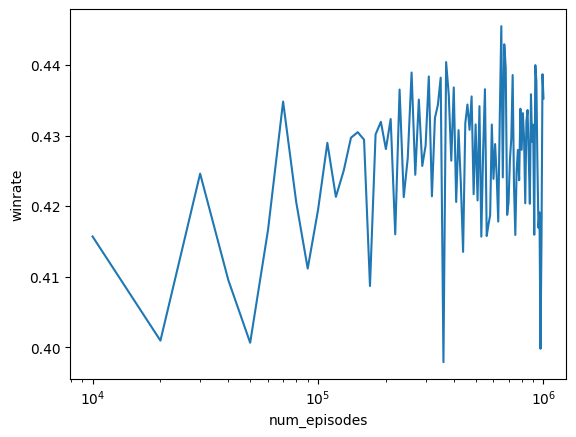

In [36]:

# Hyperparameters
alpha = 0.05  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon-greedy parameter
num_games = 100000
num_draws = 0

# Vary num_episodes and compute winrate
num_episodes_values = list(range(10000, 1010000, 10000))
winrates = []
for num_episodes in num_episodes_values:
    Q_table = np.zeros((len(state_space), len(action_space)))
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.choice(action_space)
            else:
                action = np.argmax(Q_table[state_space.index(state)])

            # Take the action
            next_state, reward, done, terminal, dic = env.step(action)

            # Update Q-value if you busted, necessary because Q_table(next_state) does not exist if you bust
            if next_state not in state_space:
                Q_table[state_space.index(state)][action] += alpha * (reward - Q_table[state_space.index(state)][action])
                break

            # Update Q-value for current state-action pair
            Q_table[state_space.index(state)][action] += alpha * (reward + gamma * np.max(Q_table[state_space.index(next_state)]) - Q_table[state_space.index(state)][action])

            state = next_state

    num_wins = 0
    num_losses = 0
    num_draws = 0
    for i in range(num_games):
        state = env.reset()[0]
        done = False
        while not done:
            action = np.argmax(Q_table[state_space.index(state)])
            next_state, reward, done, terminal, dic = env.step(action)
            state = next_state
            if done and reward == 1:
                num_wins += 1
            elif done and reward == -1:
                num_losses += 1
            elif done and reward == 0:
                num_draws += 1

    winrate = num_wins / (num_games - num_draws)
    winrates.append(winrate)
    # Save the Q-table to a file using pickle
    filename = f"{directory_path_epis}/episodes{num_episodes}_q_table_alpha{alpha}_gamma{gamma}_epsilon{epsilon}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(Q_table, f)

# Plot winrate vs num_episodes
plt.plot(num_episodes_values, winrates)
plt.xscale('log')
plt.xlabel('num_episodes')
plt.ylabel('winrate')
plt.show()



For a specific number of trainings, make a scatter plot to find the optimal values for alpha, gamma and epsilon.

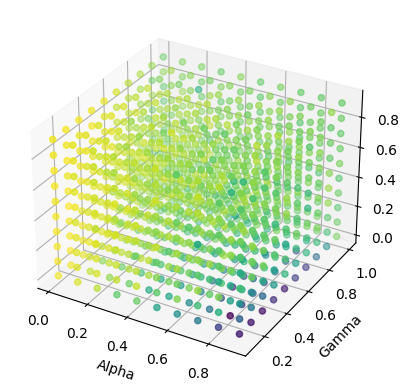

In [37]:

# Define ranges for hyperparameters
alpha_range = np.arange(0.01, 1.01, 0.1)
gamma_range = np.arange(0.1, 1.1, 0.1)
epsilon_range = np.arange(0.01, 1.01, 0.1)

# Initialize arrays to store win rate for each combination of hyperparameters
win_rates = np.zeros((alpha_range.size, gamma_range.size, epsilon_range.size))

# Training loop
for i, alpha in enumerate(alpha_range):
    for j, gamma in enumerate(gamma_range):
        for k, epsilon in enumerate(epsilon_range):
            # Run training for current hyperparameters
            Q_table = np.zeros((len(state_space), len(action_space)))
            num_episodes = 100000
            for episode in range(num_episodes):
                state = env.reset()[0]
                done = False
                while not done:
                    # Epsilon-greedy action selection
                    if np.random.random() < epsilon:
                        action = np.random.choice(action_space)
                    else:
                        action = np.argmax(Q_table[state_space.index(state)])

                    # Take the action
                    next_state, reward, done, terminal, dic = env.step(action)

                    # Update Q-value if you busted, necessary because Q_table(next_state) does not exist if you bust
                    if next_state not in state_space:
                        Q_table[state_space.index(state)][action] += alpha * (reward - Q_table[state_space.index(state)][action])
                        break

                    # Update Q-value for current state-action pair
                    Q_table[state_space.index(state)][action] += alpha * (reward + gamma * np.max(Q_table[state_space.index(next_state)]) - Q_table[state_space.index(state)][action])

                    state = next_state  

            # Evaluate win rate for current hyperparameters
            num_games = 100000
            num_wins = 0
            num_draws = 0
            num_losses = 0
            for _ in range(num_games):
                state = env.reset()[0]
                done = False
                while not done:
                    action = np.argmax(Q_table[state_space.index(state)])
                    next_state, reward, done, terminal, dic = env.step(action)
                    state = next_state
                    if done and reward == 1:
                        num_wins += 1
                    elif done and reward == -1:
                        num_losses += 1
                    elif done and reward == 0:
                        num_draws += 1
            # Record win rate for current hyperparameters
            win_rate = num_wins / (num_games - num_draws)
            win_rates[i, j, k] = win_rate
        # Save the Q-table to a file using pickle
        filename = f"{directory_path_hyp}/episodes{num_episodes}_q_table_alpha{alpha}_gamma{gamma}_epsilon{epsilon}.pkl"
        with open(filename, 'wb') as f:
            pickle.dump(Q_table, f)



In [55]:
# Visualize results
alpha_grid, gamma_grid, epsilon_grid = np.meshgrid(alpha_range, gamma_range, epsilon_range, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(alpha_grid, gamma_grid, epsilon_grid, c=win_rates.flatten(), cmap='coolwarm')
ax.set_xlabel('Alpha')
ax.set_ylabel('Gamma')
ax.set_zlabel('Epsilon')

# Add colorbar
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Win Rate', rotation=270, labelpad=10)

plt.show()

C:\Users\Callens.R\AppData\Local\Temp\ipykernel_14024\302530381.py:14: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Error in callback <function _draw_all_if_interactive at 0x0000026349F272E0> (for post_execute):


AttributeError: 'LatexManager' object has no attribute 'latex'

In [42]:
# Find indices of maximum win rate
max_idx = np.unravel_index(np.argmax(win_rates), win_rates.shape)

# Extract corresponding hyperparameters
best_alpha = alpha_range[max_idx[0]]
best_gamma = gamma_range[max_idx[1]]
best_epsilon = epsilon_range[max_idx[2]]

# Print best hyperparameters and corresponding win rate
print("Best hyperparameters:")
print(f"Alpha: {best_alpha}")
print(f"Gamma: {best_gamma}")
print(f"Epsilon: {best_epsilon}")
print(f"Win rate: {win_rates[max_idx]}")

Best hyperparameters:
Alpha: 0.01
Gamma: 0.2
Epsilon: 0.41000000000000003
Win rate: 0.4775034850663535


This gives a good range to start looking for the optimal values. Now we will go further to find the optimal values.

In [ ]:
# Define ranges for hyperparameters
# Use the 'best hyperparameters' found above as the center of the ranges
alpha_range = np.arange(0, 0.02, 0.001)
gamma_range = np.arange(0.1, 0.3, 0.01)
epsilon_range = np.arange(0.31, 0.51, 0.01)

# Initialize arrays to store win rate for each combination of hyperparameters
win_rates = np.zeros((alpha_range.size, gamma_range.size, epsilon_range.size))

# Training loop
for i, alpha in enumerate(alpha_range):
    for j, gamma in enumerate(gamma_range):
        for k, epsilon in enumerate(epsilon_range):
            # Run training for current hyperparameters
            Q_table = np.zeros((len(state_space), len(action_space)))
            num_episodes = 100000
            for episode in range(num_episodes):
                state = env.reset()[0]
                done = False
                while not done:
                    # Epsilon-greedy action selection
                    if np.random.random() < epsilon:
                        action = np.random.choice(action_space)
                    else:
                        action = np.argmax(Q_table[state_space.index(state)])

                    # Take the action
                    next_state, reward, done, terminal, dic = env.step(action)

                    # Update Q-value if you busted, necessary because Q_table(next_state) does not exist if you bust
                    if next_state not in state_space:
                        Q_table[state_space.index(state)][action] += alpha * (reward - Q_table[state_space.index(state)][action])
                        break

                    # Update Q-value for current state-action pair
                    Q_table[state_space.index(state)][action] += alpha * (reward + gamma * np.max(Q_table[state_space.index(next_state)]) - Q_table[state_space.index(state)][action])

                    state = next_state  

            # Evaluate win rate for current hyperparameters
            num_games = 100000
            num_wins = 0
            num_draws = 0
            num_losses = 0
            for _ in range(num_games):
                state = env.reset()[0]
                done = False
                while not done:
                    action = np.argmax(Q_table[state_space.index(state)])
                    next_state, reward, done, terminal, dic = env.step(action)
                    state = next_state
                    if done and reward == 1:
                        num_wins += 1
                    elif done and reward == -1:
                        num_losses += 1
                    elif done and reward == 0:
                        num_draws += 1
            # Record win rate for current hyperparameters
            win_rate = num_wins / (num_games - num_draws)
            win_rates[i, j, k] = win_rate
        # Save the Q-table to a file using pickle
        filename = f"{directory_path_hypopt}/episodes{num_episodes}_q_table_alpha{alpha}_gamma{gamma}_epsilon{epsilon}.pkl"
        with open(filename, 'wb') as f:
            pickle.dump(Q_table, f)

In [ ]:
# Visualize results
alpha_grid, gamma_grid, epsilon_grid = np.meshgrid(alpha_range, gamma_range, epsilon_range, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(alpha_grid, gamma_grid, epsilon_grid, c=win_rates.flatten(), cmap='coolwarm')
ax.set_xlabel('Alpha')
ax.set_ylabel('Gamma')
ax.set_zlabel('Epsilon')

# Add colorbar
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Win Rate', rotation=270, labelpad=10)

plt.show()

In [ ]:
# Find indices of maximum win rate
max_idx = np.unravel_index(np.argmax(win_rates), win_rates.shape)

# Extract corresponding hyperparameters
best_alpha = alpha_range[max_idx[0]]
best_gamma = gamma_range[max_idx[1]]
best_epsilon = epsilon_range[max_idx[2]]

# Print best hyperparameters and corresponding win rate
print("Best hyperparameters:")
print(f"Alpha: {best_alpha}")
print(f"Gamma: {best_gamma}")
print(f"Epsilon: {best_epsilon}")
print(f"Win rate: {win_rates[max_idx]}")